In [1]:
# importing libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
# loading the dataset

fileName ='C:/Datasets/books.csv'
booksData = pd.read_csv(fileName, error_bad_lines = False)
booksData.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Let's have a peek at our data

In [3]:
booksData.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

# We can see that there are no missing values in the data, so we can proceed to describe our data.

In [4]:
booksData.shape

(11123, 12)

In [5]:
booksData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [6]:
booksData.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


# using box plots to check for outliers

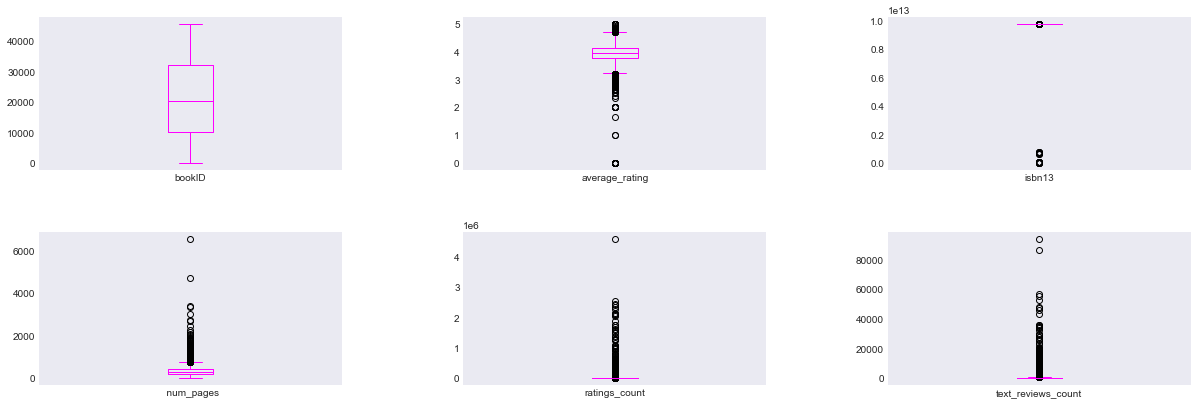

In [46]:
# using box plots to check for outliers

booksData.plot(kind = 'box', subplots=True, layout=(11,3), sharex = False, sharey = False, color='magenta')
plt.subplots_adjust(left=0.1,bottom=0.1,  right=0.9, top=0.9,  wspace=0.4, hspace=0.4)  
plt.gcf().set_size_inches(20,40)
plt.show()

# Using histograms 

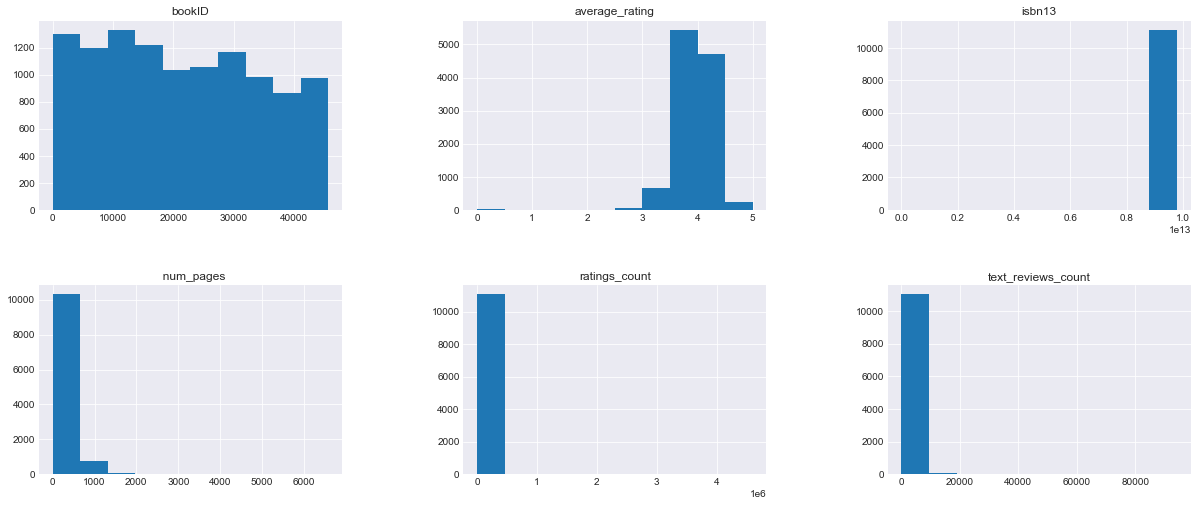

In [49]:
booksData.hist(grid =  True,layout=(9,3) )
plt.subplots_adjust(left=0.1,bottom=0.1,  right=0.9, top=0.9,  wspace=0.4, hspace=0.4)           
plt.gcf().set_size_inches(20,40)
plt.show()

# using seaborn to check for correlations

<AxesSubplot:>

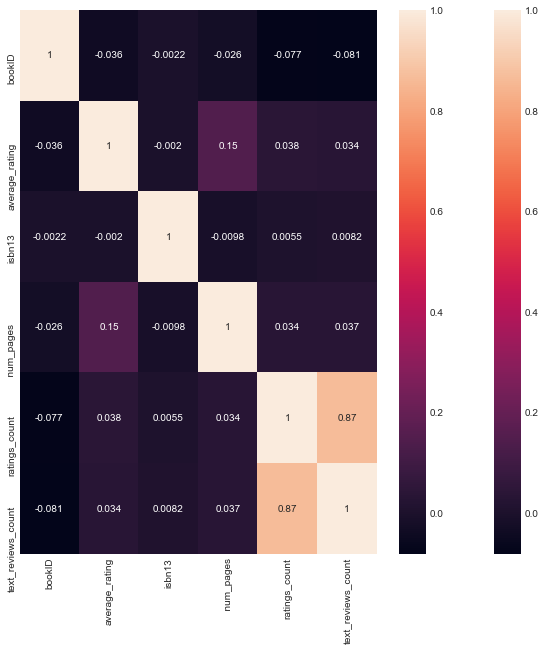

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(booksData.corr())

sns.heatmap(booksData.corr(), annot = True)

# Getting a full view of our columns. 

In [7]:
booksData.columns.to_list()

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 '  num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher']

# Getting the top five books from our data based on the ratings.

In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:xlabel='average_rating', ylabel='title'>

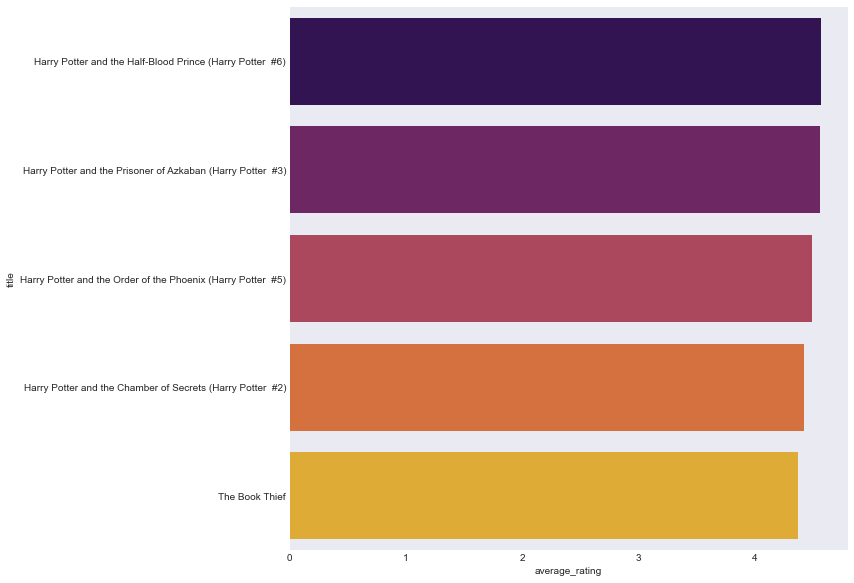

In [9]:
topTen = booksData[booksData['ratings_count'] > 1000000]
topTen.sort_values(by='average_rating', ascending=False)
plt.style.use('seaborn-dark')
plt.figure(figsize=(10, 10))
topTenData = topTen.sort_values(by='average_rating', ascending=False).head()
sns.barplot(x="average_rating", y="title", data=topTenData, palette='inferno')

# We can check the top authors in the our dataset, that is if the books they have written are present. 


C:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


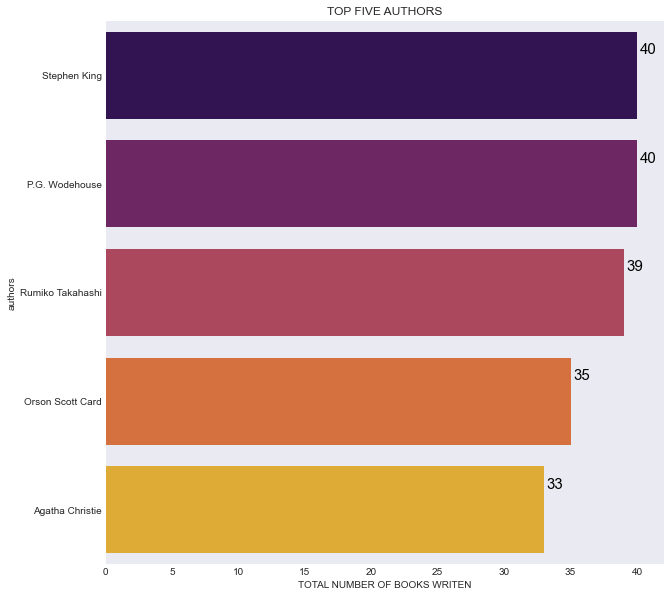

In [10]:
mostBooks = booksData.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head().set_index('authors')
plt.figure(figsize=(10,10))
ax = sns.barplot(mostBooks['title'], mostBooks.index, palette='inferno')
ax.set_title("TOP FIVE AUTHORS")
ax.set_xlabel("TOTAL NUMBER OF BOOKS WRITEN")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

# We can also check the most reviewed or commented on books based on the average ratings.

C:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


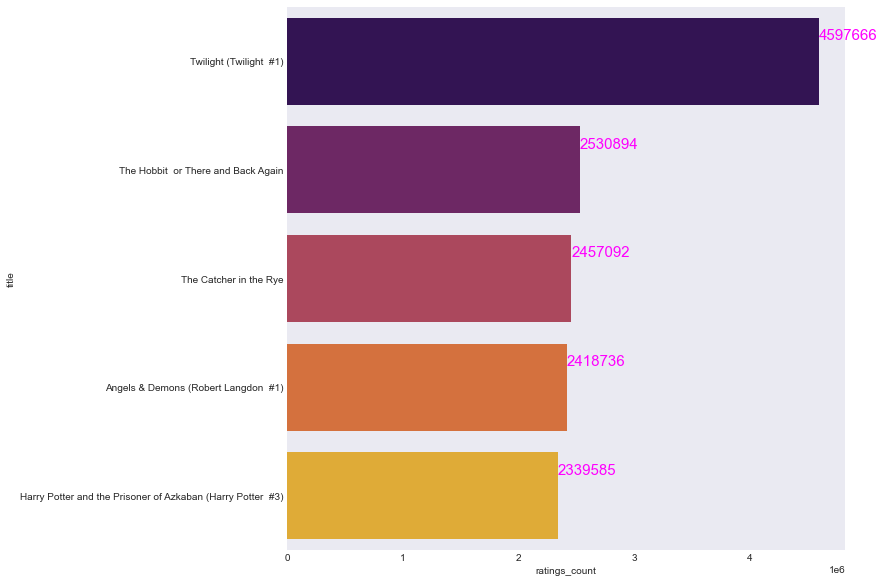

In [11]:
mostRated = booksData.sort_values('ratings_count', ascending = False).head().set_index('title')
plt.figure(figsize=(10,10))
ax = sns.barplot(mostRated['ratings_count'], mostRated.index, palette = 'inferno')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='magenta')
plt.show()

We can try to check for a relationship between the average rating and the number of pages in the book. This information will be useful in helping us build our recommendation system. 

Text(0.5, 16.200000000000003, 'AVERAGE RATING')

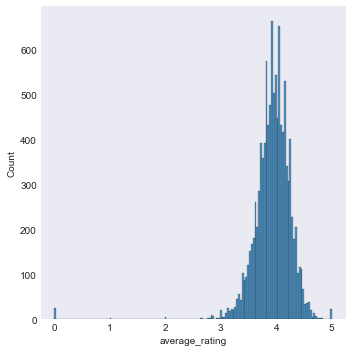

In [12]:
booksData.average_rating = booksData.average_rating.astype(float)
sns.displot(booksData['average_rating'])
ax.set_title('AVERAGE RATING FOR ALL BOOKS',fontsize=20)
ax.set_xlabel('AVERAGE RATING',fontsize=20)

# AVERAGE  RATINGS

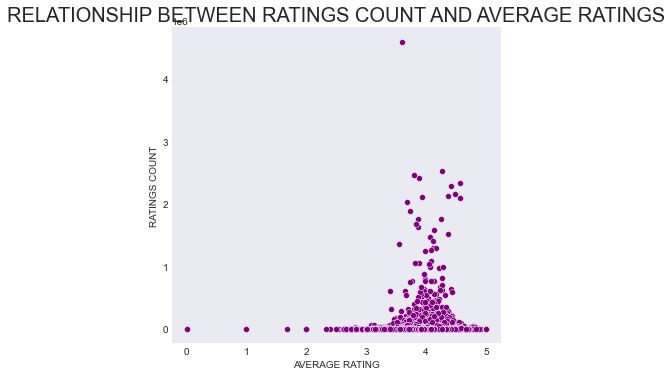

In [13]:
ax = sns.relplot(data=booksData, x="average_rating", y="ratings_count", color = 'purple', sizes=(100, 200), height=5, marker='o')
plt.title("RELATIONSHIP BETWEEN RATINGS COUNT AND AVERAGE RATINGS",fontsize = 20)
ax.set_axis_labels("AVERAGE RATING", "RATINGS COUNT")

# CHECKING CORRELATION

<Figure size 1440x1440 with 0 Axes>

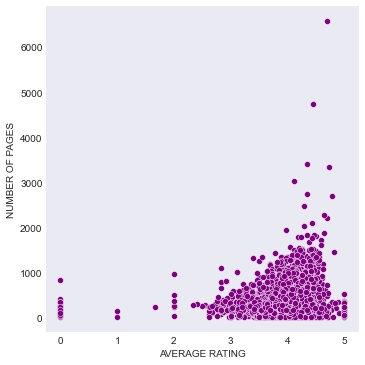

In [14]:
plt.figure(figsize=(20,20))
ax = sns.relplot(x="average_rating", y="  num_pages", data=booksData, color = 'purple',sizes=(100, 200), height=5, marker='o')
ax.set_axis_labels("AVERAGE RATING", "NUMBER OF PAGES")

In [15]:
booksData2 = booksData.copy()
booksData2.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


# creating a new column in our DataFrame..

In [16]:
booksData2.loc[ (booksData2['average_rating'] >= 0) & (booksData2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
booksData2.loc[ (booksData2['average_rating'] > 1) & (booksData2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
booksData2.loc[ (booksData2['average_rating'] > 2) & (booksData2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
booksData2.loc[ (booksData2['average_rating'] > 3) & (booksData2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
booksData2.loc[ (booksData2['average_rating'] > 4) & (booksData2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [17]:
booksData2.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,between 4 and 5


In [23]:
booksDataRating = pd.get_dummies(booksData2['rating_between'])
booksDataLanguage = pd.get_dummies(booksData2['language_code'])


# Notice how we assigned a value of 1 in our data if one grade falls under a particular group, say 4 and 5, and the others assigned a value of 0.

# Let's now create a new DataFrame called 'features' to use in our recommendation system

In [24]:
features = pd.concat([booksDataRating, 
                      booksDataLanguage, 
                      booksData2['average_rating'], 
                      booksData2['ratings_count']], axis=1)

In [29]:
#rescaling the data using to reduce biasness in the values. 

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)
features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

# BUILDING THE MODEL

In [30]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [33]:

def BookRecommender(bookName):
    bookListName = []
    bookId = booksData2[booksData2['title'] == bookName].index
    bookId = bookId[0]
    for newId in idlist[bookId]:
        bookListName.append(booksData2.loc[newId].title)
    return bookListName
    
BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)']

# Using the function above, we can pass the name of a book to it. The model will then try to find books similar to the one we passed in, based on the features of the book. Our function will then store those book names that it recommends in a list and return them at the end. As we can see, the model made a good recommendation. 

